In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
application_record_df = pd.read_csv('C:/Users/Akans/Downloads/Credit card prediction/application_record.csv')
credit_record_df = pd.read_csv('C:/Users/Akans/Downloads/Credit card prediction/credit_record.csv')

In [3]:
application_record_df.shape
application_record_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
credit_record_df.shape
#credit_record_df.head()

(1048575, 3)

In [5]:
df = pd.merge(application_record_df, credit_record_df, on='ID', how='outer')


In [6]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,0.0,C
1,5008804,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-1.0,C
2,5008804,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-2.0,C
3,5008804,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-3.0,C
4,5008804,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-4.0,C


In [7]:
null_counts = df.isnull().sum()
null_counts

ID                          0
CODE_GENDER            270860
FLAG_OWN_CAR           270860
FLAG_OWN_REALTY        270860
CNT_CHILDREN           270860
AMT_INCOME_TOTAL       270860
NAME_INCOME_TYPE       270860
NAME_EDUCATION_TYPE    270860
NAME_FAMILY_STATUS     270860
NAME_HOUSING_TYPE      270860
DAYS_BIRTH             270860
DAYS_EMPLOYED          270860
FLAG_MOBIL             270860
FLAG_WORK_PHONE        270860
FLAG_PHONE             270860
FLAG_EMAIL             270860
OCCUPATION_TYPE        633788
CNT_FAM_MEMBERS        270860
MONTHS_BALANCE         402100
STATUS                 402100
dtype: int64

In [8]:
df.shape

(1450675, 20)

In [9]:
df = df.dropna()
#df = df[df['MONTHS_BALANCE'] >= -2]
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
31,5008806,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,0.0,C
32,5008806,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,-1.0,C
33,5008806,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,-2.0,C
34,5008806,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,-3.0,C
35,5008806,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,-4.0,C


In [10]:
df['STATUS'] = df['STATUS'].apply(lambda x: 1 if x == 'C' else 0)
df.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64

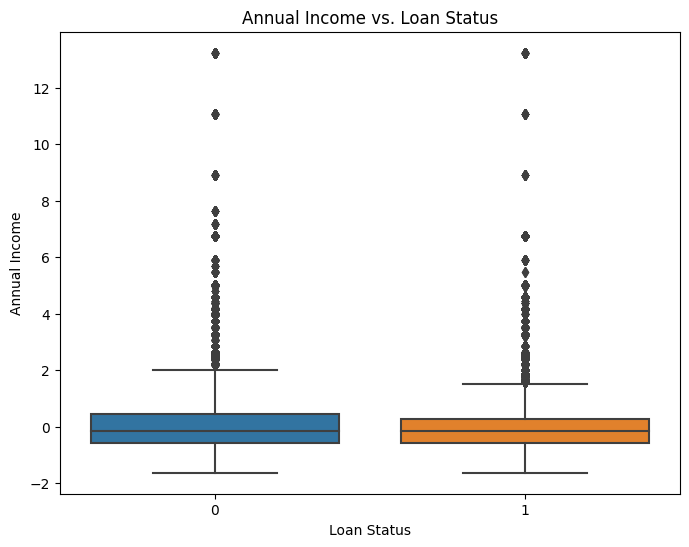

In [11]:
scaler = StandardScaler()

df['AMT_INCOME_TOTAL'] = scaler.fit_transform(df['AMT_INCOME_TOTAL'].values.reshape(-1, 1))


plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='STATUS', y='AMT_INCOME_TOTAL')
plt.title('Annual Income vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.show()

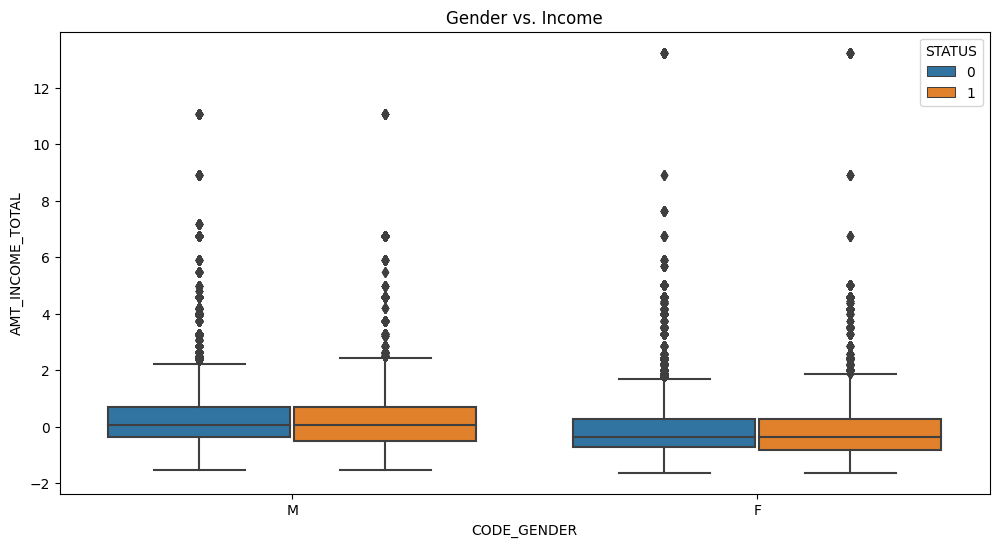

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='CODE_GENDER', y='AMT_INCOME_TOTAL', hue='STATUS')
plt.title('Gender vs. Income')
plt.show()

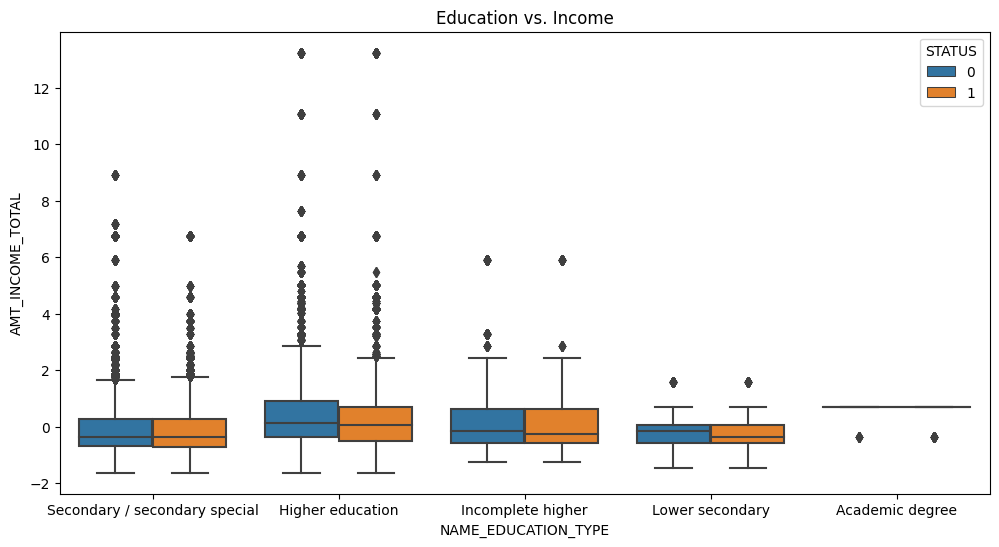

In [13]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=df, x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', hue='STATUS')
plt.title('Education vs. Income')
plt.show()

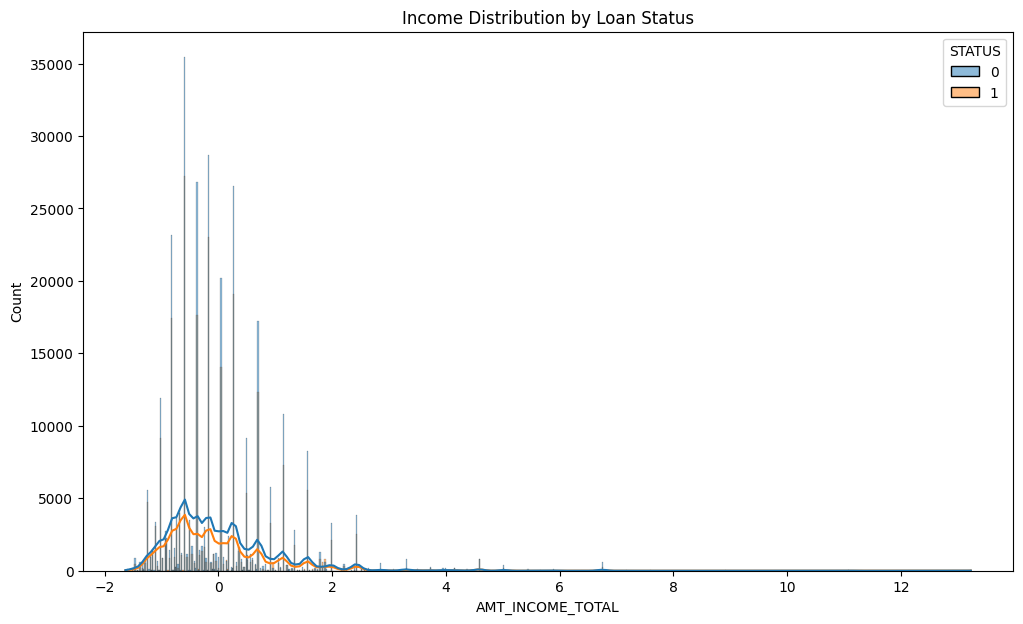

In [14]:
scaler = StandardScaler()
df['AMT_INCOME_TOTAL'] = scaler.fit_transform(df['AMT_INCOME_TOTAL'].values.reshape(-1, 1))


plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='AMT_INCOME_TOTAL', kde=True, hue='STATUS')
plt.title('Income Distribution by Loan Status')
plt.show()


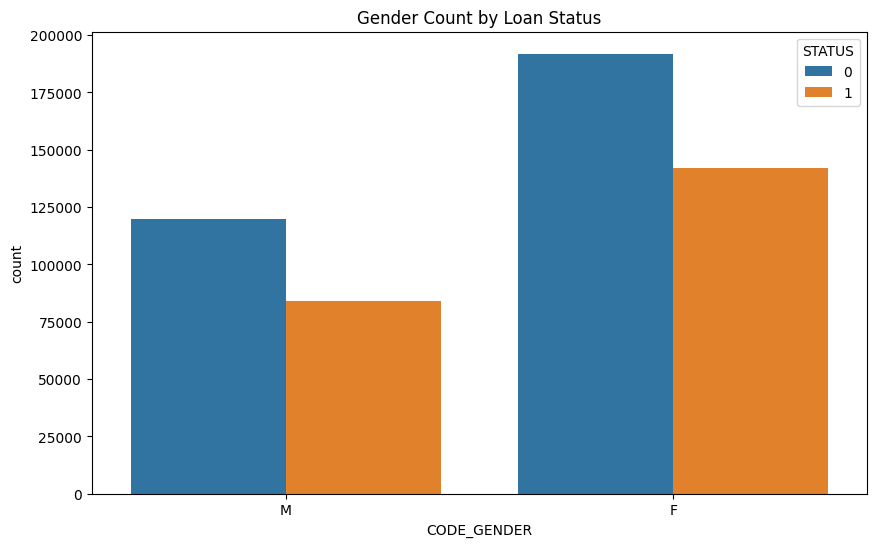

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='CODE_GENDER', hue='STATUS')
plt.title('Gender Count by Loan Status')
plt.show()



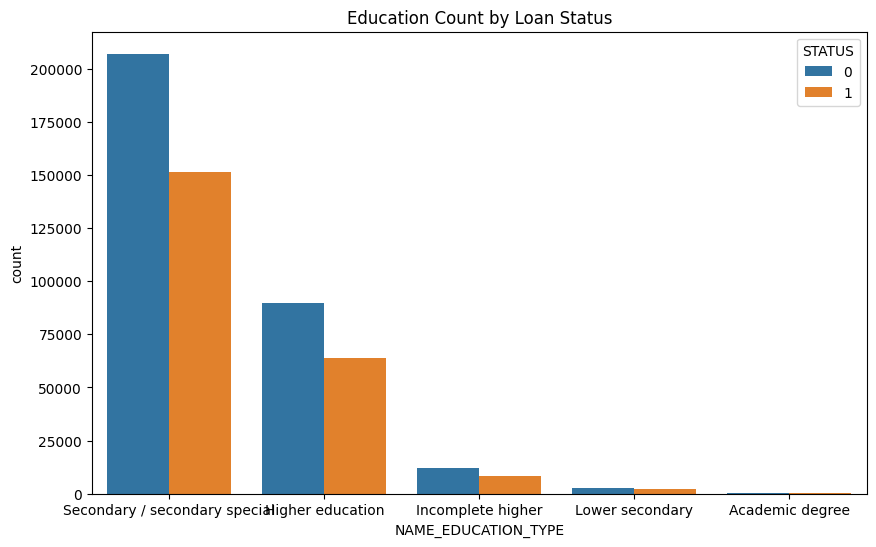

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NAME_EDUCATION_TYPE', hue='STATUS')
plt.title('Education Count by Loan Status')
plt.show()

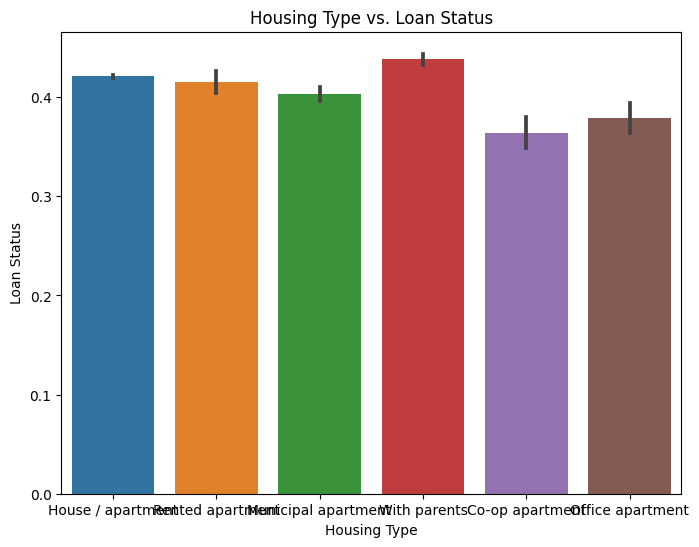

In [17]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='NAME_HOUSING_TYPE', y='STATUS')
plt.title("Housing Type vs. Loan Status")
plt.xlabel("Housing Type")
plt.ylabel("Loan Status")
plt.show()

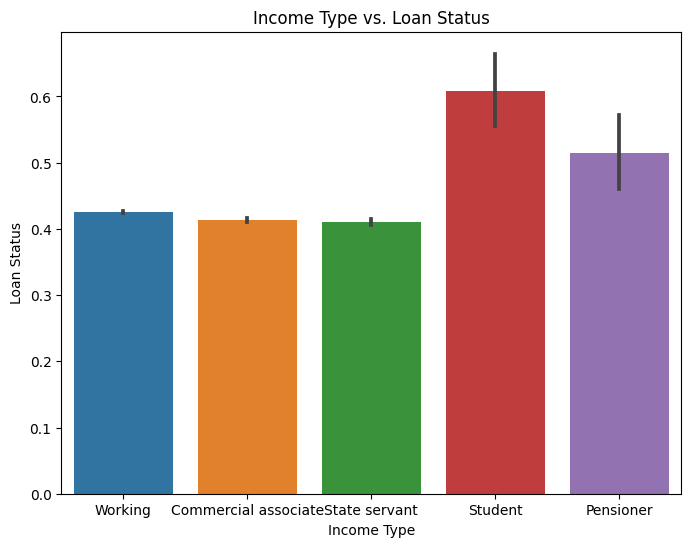

In [18]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='NAME_INCOME_TYPE', y='STATUS')
plt.title("Income Type vs. Loan Status")
plt.xlabel("Income Type")
plt.ylabel("Loan Status")
plt.show()

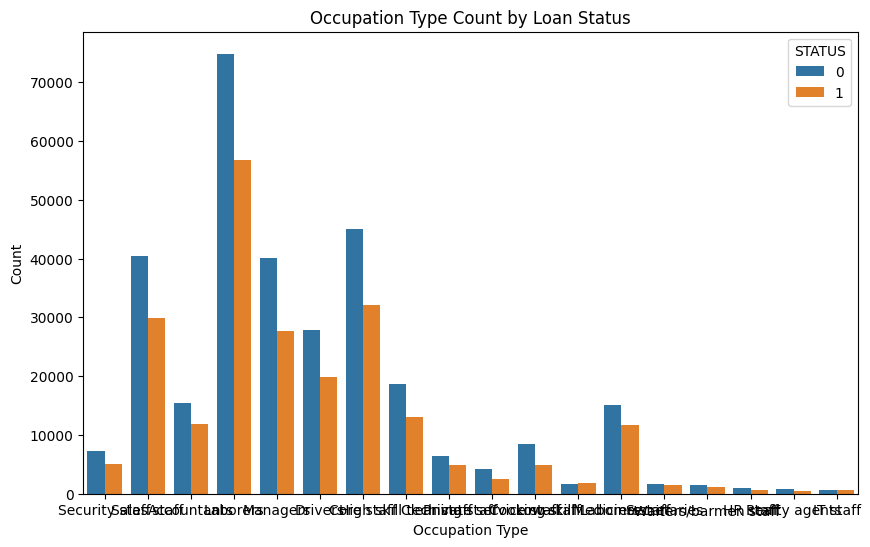

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='OCCUPATION_TYPE', hue='STATUS')
plt.title("Occupation Type Count by Loan Status")
plt.xlabel("Occupation Type")
plt.ylabel("Count")
plt.show()

In [20]:

label_encoder = LabelEncoder()

df['CODE_GENDER'] = label_encoder.fit_transform(df['CODE_GENDER'])
df['FLAG_OWN_CAR'] = label_encoder.fit_transform(df['FLAG_OWN_CAR'])
df['FLAG_OWN_REALTY'] = label_encoder.fit_transform(df['FLAG_OWN_REALTY'])
df['NAME_INCOME_TYPE'] = label_encoder.fit_transform(df['NAME_INCOME_TYPE'])
df['NAME_EDUCATION_TYPE'] = label_encoder.fit_transform(df['NAME_EDUCATION_TYPE'])
df['NAME_FAMILY_STATUS'] = label_encoder.fit_transform(df['NAME_FAMILY_STATUS'])
df['NAME_HOUSING_TYPE'] = label_encoder.fit_transform(df['NAME_HOUSING_TYPE'])
df['OCCUPATION_TYPE'] = label_encoder.fit_transform(df['OCCUPATION_TYPE'])
df = df.drop(['FLAG_MOBIL'], axis = 1)

df.corr()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
ID,1.000000,-0.004041,-0.025431,-0.085132,0.031586,-0.024915,0.025639,-0.001710,0.006340,0.009560,0.029609,0.014325,0.098981,0.014584,-0.072886,0.013623,0.026159,0.004673,0.006035
CODE_GENDER,-0.004041,1.000000,0.346480,-0.043079,0.046246,0.191443,0.046306,0.044808,-0.067353,0.047621,0.107791,0.131611,0.015376,-0.026068,-0.022866,-0.014048,0.075483,0.013313,-0.011734
FLAG_OWN_CAR,-0.025431,0.346480,1.000000,0.005176,0.072250,0.201243,-0.001487,-0.075241,-0.094533,0.001701,0.080779,0.065124,-0.027221,-0.032976,0.005493,-0.040148,0.114709,-0.000517,-0.009833
FLAG_OWN_REALTY,-0.085132,-0.043079,0.005176,1.000000,0.007409,0.043247,-0.036081,0.002595,0.016231,-0.174455,-0.095824,-0.016816,-0.216011,-0.059563,0.060949,0.015576,0.007272,-0.005988,0.004770
CNT_CHILDREN,0.031586,0.046246,0.072250,0.007409,1.000000,-0.014309,0.034045,-0.031554,-0.143813,0.020314,0.277567,0.073164,-0.016432,-0.029202,-0.013942,-0.019639,0.904351,-0.000430,-0.007696
AMT_INCOME_TOTAL,-0.024915,0.191443,0.201243,0.043247,-0.014309,1.000000,-0.156425,-0.220444,0.031923,-0.016504,-0.047838,-0.009500,-0.078836,0.007914,0.067699,0.006981,-0.025477,-0.001829,-0.030684
NAME_INCOME_TYPE,0.025639,0.046306,-0.001487,-0.036081,0.034045,-0.156425,1.000000,0.121248,-0.010589,0.001489,-0.020017,-0.038757,0.072173,0.006629,-0.029954,-0.018340,0.036957,-0.004922,0.010884
NAME_EDUCATION_TYPE,-0.001710,0.044808,-0.075241,0.002595,-0.031554,-0.220444,0.121248,1.000000,-0.013668,-0.016322,-0.142696,-0.049141,0.009376,-0.052543,-0.089918,0.089001,-0.019661,-0.001658,0.004300
NAME_FAMILY_STATUS,0.006340,-0.067353,-0.094533,0.016231,-0.143813,0.031923,-0.010589,-0.013668,1.000000,0.031599,-0.028242,-0.002415,-0.041570,-0.019979,-0.006376,-0.018185,-0.503980,0.018498,-0.008241
NAME_HOUSING_TYPE,0.009560,0.047621,0.001701,-0.174455,0.020314,-0.016504,0.001489,-0.016322,0.031599,1.000000,0.172734,0.061564,0.002499,-0.014655,-0.011939,-0.030158,-0.002647,0.015019,0.005567


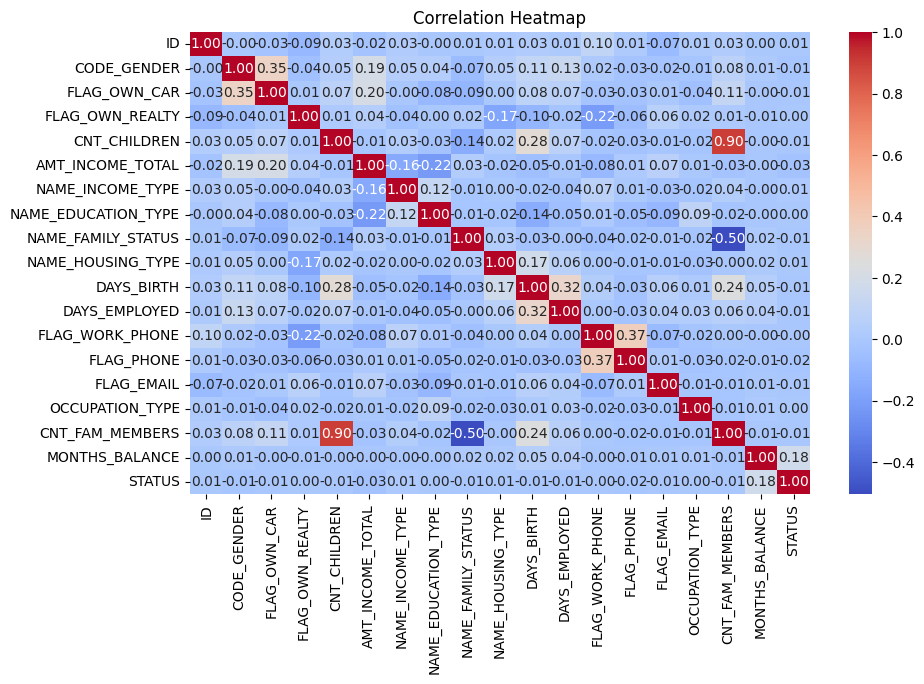

In [21]:
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()